# CA05: kNN based Movie Recommender Engine

<i>
Dani Le, Efren Lopez, Luis Otero
<br>
BSAN 6070
<br>
March 19, 2024
<br>
</i>

GitHub Links:
*   Dani: https://github.com/ledani-bu/ml
*   Efren: https://github.com/efrenlop01/
*   Luis: https://github.com/otero106/BSAN6070

## Table of Contents
* [Project Overview](#overview)
* [Python Implementation](#python)
    * [Data Source and Contents](#part1)
    * [Building the Recommender System](#part2)

## Project Overview <a class="anchor" id="overview"></a>

<b>
Given a movies data set, what are the 5 most similar movies to a movie query?
</b>

In this project, we will be using a subset of an IMDB movies dataset to build a movie recommender program that runs on k-Nearest Neighbors. kNN is a supervised machine learning algorithm that is used for both regression and classification, based on the idea that the closest observations to a given data point are the most "similar." When a kNN model is given a data point to classify, it will define it based on the characteristics of the closest actual records, with the number of observations to be used defined by the user (k). Using this algorithm, we will build our own movie recommendation engine that a user would normally see on susbscription services such as Netflix, Prime Video, or Hulu.

The data contains thirty movies, including data for each movie across seven genres and their IMDB ratings. The labels column values are all zeroes because we aren’t using this data set for classification or regression. The implementation assumes that all columns contain numerical data. Additionally, there are relationships among the movies that will not be accounted for (e.g. actors, directors, and themes) when using the KNN algorithm simply because the data that captures those relationships are missing from the data set. Consequently, when we run the KNN algorithm on our data, similarity will be based solely on the included genres and the IMDB ratings of the movies.

We will create a scenario in which a user goes onto a recommendation website and wishes to look at movies that are similar to "The Post." In the end, our program will display five movies that are comparable to "The Post.

## Python Implementation <a class="anchor" id="python"></a>

### Part 1: Data Source and Contents <a class="anchor" id="part1"></a>

#### Importing and Exploring Data

In [3]:
#import modules
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [4]:
#import data
data = pd.read_csv('https://github.com/ArinB/MSBA-CA-Data/raw/main/CA05/movies_recommendation_data.csv')

#check data size and columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Movie ID     30 non-null     int64  
 1   Movie Name   30 non-null     object 
 2   IMDB Rating  30 non-null     float64
 3   Biography    30 non-null     int64  
 4   Drama        30 non-null     int64  
 5   Thriller     30 non-null     int64  
 6   Comedy       30 non-null     int64  
 7   Crime        30 non-null     int64  
 8   Mystery      30 non-null     int64  
 9   History      30 non-null     int64  
 10  Label        30 non-null     int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 2.7+ KB


In [12]:
#display first 5 rows
data.head(10)

,Movie Name,IMDB Rating,Biography,Drama,Thriller,Comedy,Crime,Mystery,History
0,The Imitation Game,8.0,1,1,1,0,0,0,0
1,Ex Machina,7.7,0,1,0,0,0,1,0
2,A Beautiful Mind,8.2,1,1,0,0,0,0,0
3,Good Will Hunting,8.3,0,1,0,0,0,0,0
4,Forrest Gump,8.8,0,1,0,0,0,0,0
5,21,6.8,0,1,0,0,1,0,1
6,Gifted,7.6,0,1,0,0,0,0,0
7,Travelling Salesman,5.9,0,1,0,0,0,1,0
8,Avatar,7.9,0,0,0,0,0,0,0
9,The Karate Kid,7.2,0,1,0,0,0,0,0


#### Prepping the Data

In [6]:
#drop Label and Movie ID columns
drop_cols = ['Label', 'Movie ID']
data = data.drop(drop_cols, axis=1)

#selecting feature variables after Movie ID
features = data.columns[1:]

features

Index(['IMDB Rating', 'Biography', 'Drama', 'Thriller', 'Comedy', 'Crime',
       'Mystery', 'History'],
      dtype='object')

#### Data Vizualization

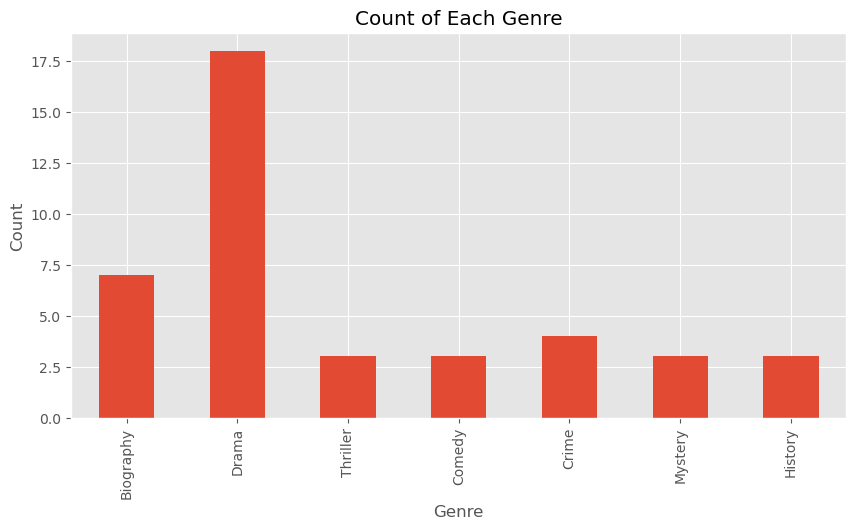

In [7]:
#bar chart showing count of each genre, treat each genre as a feature
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
data[features[1:]].sum().plot(kind='bar')
plt.title('Count of Each Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

### Part 2: Building the Recommender System <a class="anchor" id="part2"></a>

In [8]:
#storing "The Post" movie data in a variable
the_post = {'IMDB Rating': 7.2, 'Biography': 1, 'Drama': 1, 'Thriller': 0, 'Comedy': 0, 'Crime': 0, 'Mystery': 0, 'History': 1}

#creating a dataframe for "The Post" movie
the_post = pd.DataFrame(the_post, index=[0])

the_post

,IMDB Rating,Biography,Drama,Thriller,Comedy,Crime,Mystery,History
0,7.2,1,1,0,0,0,0,1


In [11]:
#build knn model
#using brute force algorithm and euclidean distance
neigh = NearestNeighbors(n_neighbors = 5, algorithm = 'brute', metric = 'minkowski')
neigh.fit(data[features])

#finding 5 nearest neighbors to "The Post" movie
distances, indices = neigh.kneighbors(the_post)

#displaying 5 nearest neighbors to "The Post"
data.iloc[indices[0]]

,Movie Name,IMDB Rating,Biography,Drama,Thriller,Comedy,Crime,Mystery,History
28,12 Years a Slave,8.1,1,1,0,0,0,0,1
27,Hacksaw Ridge,8.2,1,1,0,0,0,0,1
29,Queen of Katwe,7.4,1,1,0,0,0,0,0
16,The Wind Rises,7.8,1,1,0,0,0,0,0
9,The Karate Kid,7.2,0,1,0,0,0,0,0


In [10]:
#print the distances
print("Recommendations for The Post:")
for i in range(len(distances.flatten())):
    print(f'{data.iloc[indices[0][i]]["Movie Name"]}, with distance of {distances[0][i]}')

Recommendations for The Post:
12 Years a Slave, with distance of 0.9000000000000012
Hacksaw Ridge, with distance of 1.0
Queen of Katwe, with distance of 1.0198039027185601
The Wind Rises, with distance of 1.1661903789690629
The Karate Kid, with distance of 1.4142135623730951


According to our kNN model, the top 5 film recommendations that are similar to "The Post" are:
1. 12 Years a Slave
2. Hacksaw Ridge
3. Queen of Katwe
4. The Wind Rises
5. The Karate Kid